In [9]:
import torch

x = torch.arange(4.0, requires_grad=True)
x

tensor([0., 1., 2., 3.], requires_grad=True)

In [10]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [11]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [12]:
x.grad == 4 * x

tensor([True, True, True, True])

In [13]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
print(y)
x.grad

tensor(6., grad_fn=<SumBackward0>)


tensor([1., 1., 1., 1.])

In [14]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

In [15]:
#分离计算
x.grad.zero_()
y[:] = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [16]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [17]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()
print(a)
a.grad == d / a
#我们现在可以分析上面定义的f函数。 请注意，它在其输入a中是分段线性的。 换言之，对于任何a，存在某个常量标量k，使得f(a)=k*a，其中k的值取决于输入a，因此可以用d/a验证梯度是否正确。

tensor(-0.0126, requires_grad=True)


tensor(True)

In [18]:
mm = torch.randn(4, 5)
mm

tensor([[ 0.6689,  0.1844, -0.9700,  0.4785, -0.6641],
        [-0.3876, -1.4661, -0.1772,  0.2945,  1.5520],
        [ 1.1923, -0.1319,  0.9340, -0.4854,  0.7540],
        [-1.0227, -1.1913, -0.4732, -0.5825, -1.4239]])

In [19]:
#当 a 的范数大于10时，梯度为所有元素为 1 的向量；当 a 的梯度不大于 10 时，梯度为所有元素为 2 的向量。
def f(a):
    if a.norm() > 10:
        b = a
    else:
        b = 2 * a
    return b.sum()


a = torch.tensor([1.0, 2.0, 3.0, 4.0, 5.0], requires_grad=True)
d = f(a)
d.backward()
a.grad

tensor([2., 2., 2., 2., 2.])

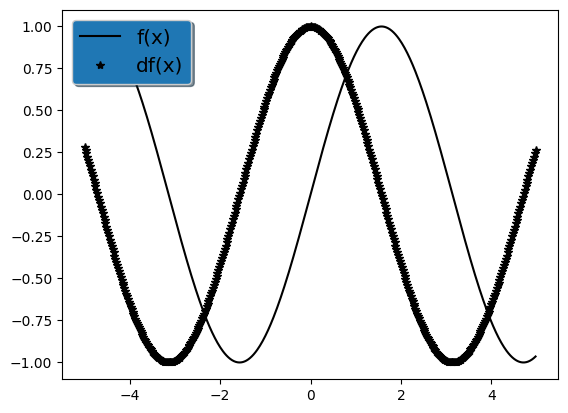

In [20]:
#使f(x) = sin(x)，绘制f(x)和 df(x)/dx 的图像，其中后者不使用f ′(x) = cos(x)。
#导入相应的库
import numpy as np
import torch
import matplotlib.pyplot as plt

#做一些定义
x = np.arange(-5, 5, 0.02)  #定义自变量在[5,5]之间，每个数间隔0.02
f = np.sin(x)
df = []

for i in x:
    #对x的每一个值都去求一下导数
    v = torch.tensor(i, requires_grad=True)
    y = torch.sin(v)
    y.backward()
    df.append(v.grad)
#绘图部分
# Create plots with pre-defined labels.
fig, ax = plt.subplots()
ax.plot(x, f, 'k', label='f(x)')
ax.plot(x, df, 'k*', label='df(x)')

legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
legend.get_frame().set_facecolor('C0')

plt.show()
